# Preprocessing for time series

## Importing libraries and data

In [1]:
import pandas as pd
df = pd.read_csv("daily-total-female-births-CA.csv", header = 0)
df.head() #First five records

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [2]:
df.info() #Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


## Loading data with parsed datetime

In [3]:
df = pd.read_csv("daily-total-female-births-CA.csv", header = 0, parse_dates = [0])
df.head() #First five records

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In this case, dataframe was created correctly, but if it is necessary: <br>
dateparse = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")<br>
df = pd.read_csv("xxx.csv", ..., parse_dates = [0], date_parse = dateparse)

## Importing data as series

In [6]:
serie = pd.read_csv("daily-total-female-births-CA.csv", header = 0, index_col = 0, parse_dates = [0],
                   squeeze = True)
serie.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

## Exploring data
#### Size 

In [8]:
serie.shape

(365,)

In [10]:
print(serie["1959-01"])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [13]:
df[(df["date"] > "1959-01-01") & (df["date"] <= "1959-01-21")]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


## Descriptive statistics

In [14]:
serie.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [15]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


## Time series data visualization

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
dataviz = df.copy()
dataviz.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:title={'center':'Births everyday on 1959'}, xlabel='Dates', ylabel='Births'>

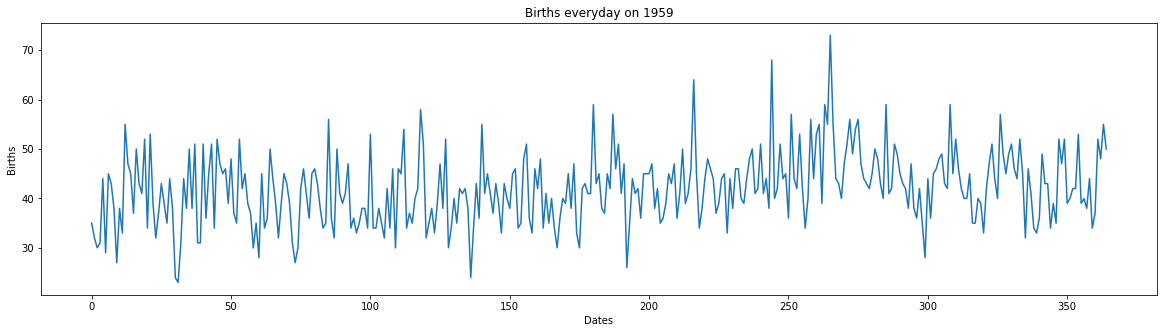

In [24]:
dataviz["births"].plot(figsize = (20, 5), title = "Births everyday on 1959", 
                       ylabel = "Births", xlabel = "Dates")

<AxesSubplot:title={'center':'Births everyday on 1959'}, xlabel='Dates', ylabel='Births'>

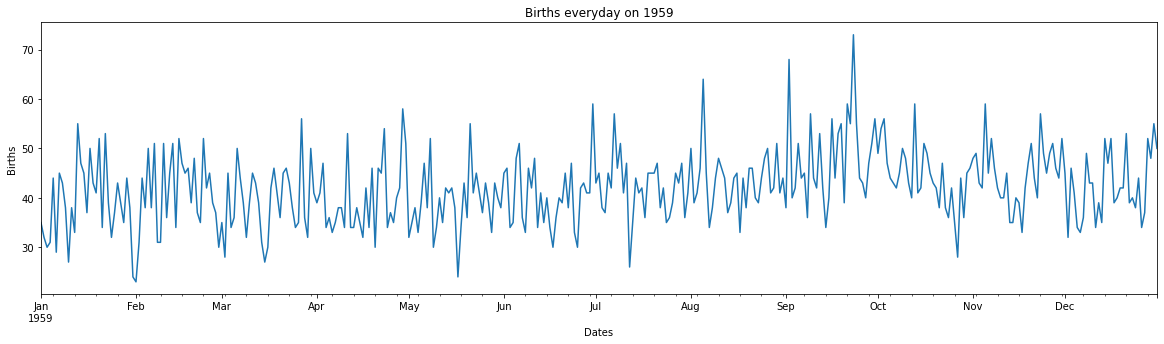

In [25]:
dataviz.index = dataviz["date"]
dataviz["births"].plot(figsize = (20, 5), title = "Births everyday on 1959", 
                       ylabel = "Births", xlabel = "Dates")

## Zooming in

In [27]:
dataviz2 = dataviz[(dataviz["date"] >= "1959-01-01") & (dataviz["date"] <= "1959-01-10")].copy()
dataviz2.head(figsize = (20, 5), title = "Births everyday on 1959", 
                       ylabel = "Births", xlabel = "Dates")

TypeError: head() got an unexpected keyword argument 'figsize'

<AxesSubplot:title={'center':'Births everyday on 1959'}, xlabel='Dates', ylabel='Births'>

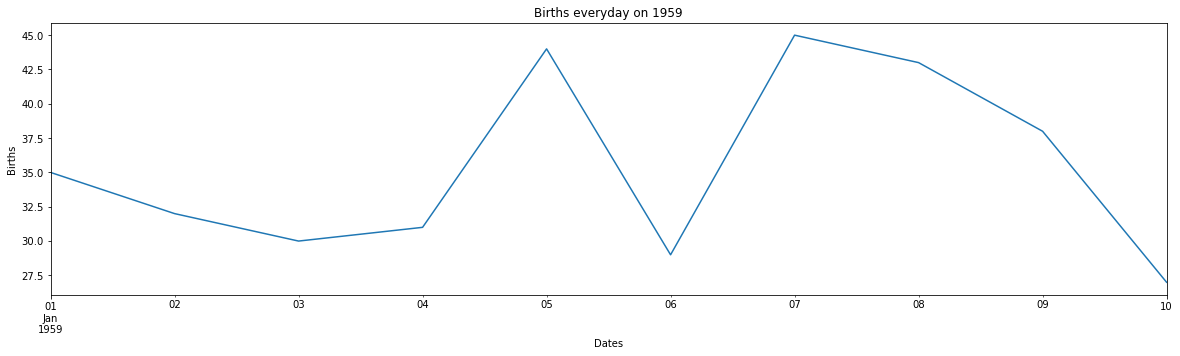

In [28]:
dataviz2["births"].plot(figsize = (20, 5), title = "Births everyday on 1959", 
                       ylabel = "Births", xlabel = "Dates")

## Trendline

In [29]:
import seaborn as sns

<AxesSubplot:ylabel='births'>

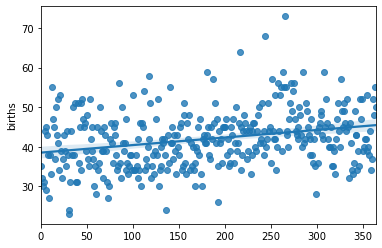

In [30]:
sns.regplot(x = df.index.values, y = df["births"])

<AxesSubplot:ylabel='births'>

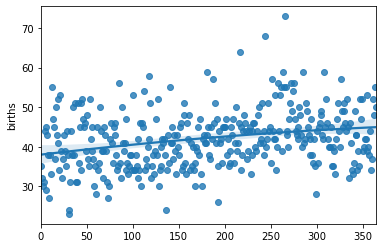

In [34]:
sns.regplot(x = df.index.values, y = df["births"], order = 2)

In [36]:
df2 = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates = [0])
df2.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

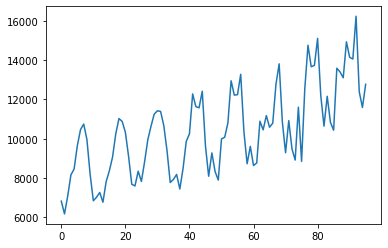

In [38]:
df2["MilesMM"].plot()

<AxesSubplot:ylabel='MilesMM'>

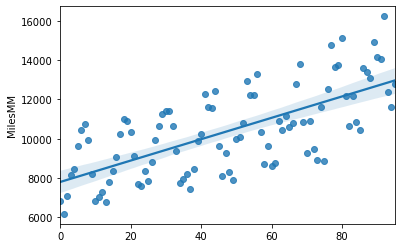

In [40]:
sns.regplot(x = df2.index.values, y = df2["MilesMM"])

## Removing seasonality

In [41]:
df2["year"] = df2["Month"].dt.year
df2.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [47]:
df2.groupby("year")["MilesMM"].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

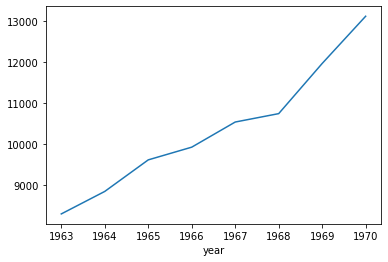

In [48]:
df2.groupby("year")["MilesMM"].mean().plot()

In [49]:
df2["lag1"] = df2["MilesMM"].shift(1)
df2.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

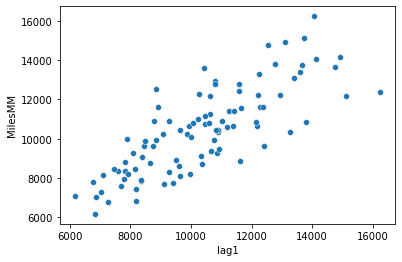

In [54]:
sns.scatterplot(x = "lag1", y = "MilesMM", data = df2)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

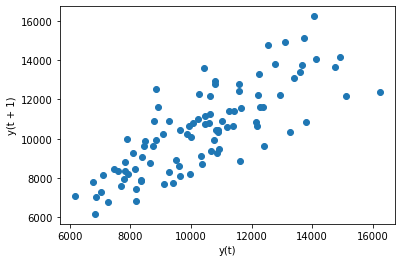

In [52]:
from pandas.plotting import lag_plot
lag_plot(df2["MilesMM"])

## Autocorrelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

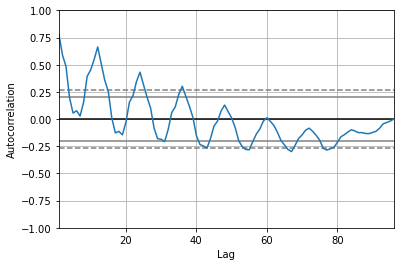

In [56]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2["MilesMM"])

## Feature engineer
### Date time features

In [57]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [58]:
features = df.copy()
features["year"] = features["date"].dt.year
features["month"] = features["date"].dt.month
features["day"] = features["date"].dt.day
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [63]:
features["lag1"] = features["births"].shift(1)
features["lag2"] = features["births"].shift(365)
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


## Window features

In [66]:
features["roll_mean"] = features["births"].rolling(window = 2).mean()
features["roll_max"] = features["births"].rolling(window = 3).max()
features.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


## Expanding feature

In [67]:
features["expand_max"] = features["births"].expanding().max()
features.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


## Downsampling and upsampling

In [68]:
df2 = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates = [0])
df2.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### Downsampling

In [69]:
quaterly = df2.resample("Q", on = "Month").mean()
quaterly.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [70]:
yearly_total = df2.resample("A", on = "Month").sum()
yearly_total.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


### Upsampling

In [71]:
daily = df2.resample("D", on = "Month").mean()
daily.head()

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN


In [72]:
interpolated = daily.interpolate(method = "linear")
interpolated.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065


<AxesSubplot:xlabel='Month'>

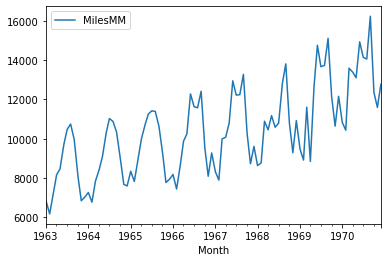

In [73]:
interpolated.plot()

In [74]:
poly_interpolated = daily.interpolate(method = "spline", order = 2)
poly_interpolated.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6775.328886
1963-01-03,6725.739829
1963-01-04,6678.197709
1963-01-05,6632.702526


<AxesSubplot:xlabel='Month'>

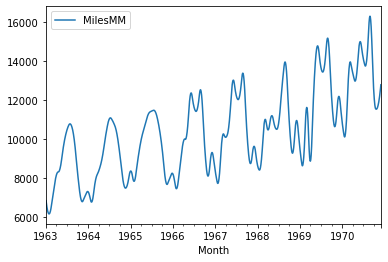

In [75]:
poly_interpolated.plot()